In [ ]:

%pip install scikit-learn


In [ ]:
import sys
import os
import pandas as pd

sys.path.append("C:\\Users\\Hrulekh Nandan\\Documents\\institutional_buy_sell_prediction\\src")

from data_loader import load_data

df = load_data("C:\\Users\\Hrulekh Nandan\\Documents\\institutional_buy_sell_prediction\\data\\bse.csv")

df.head()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(df['VOLUME'], df['close'], alpha=0.7, color='teal')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Closing Price vs Trading Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

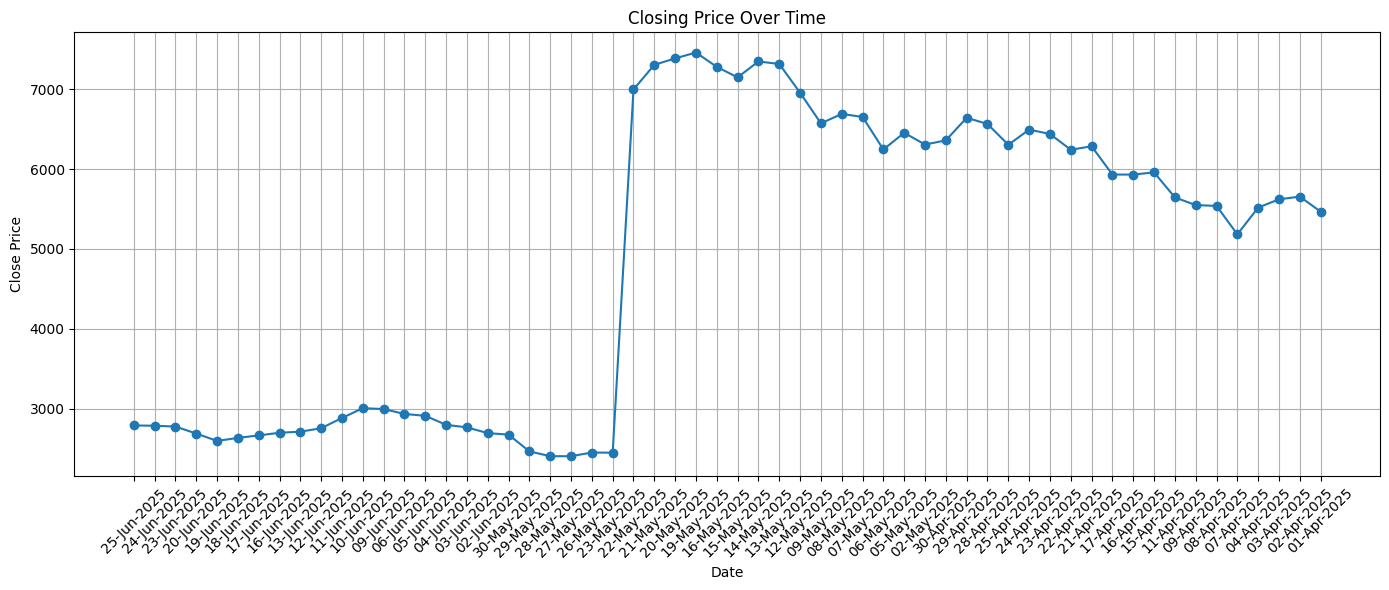

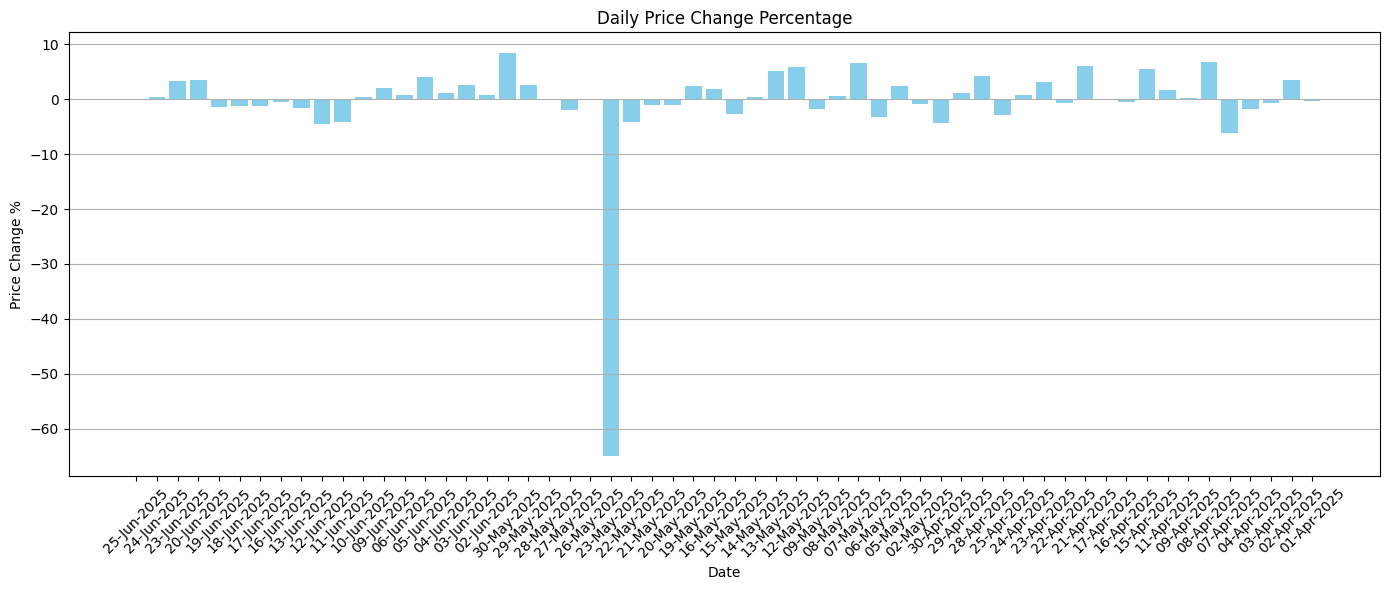

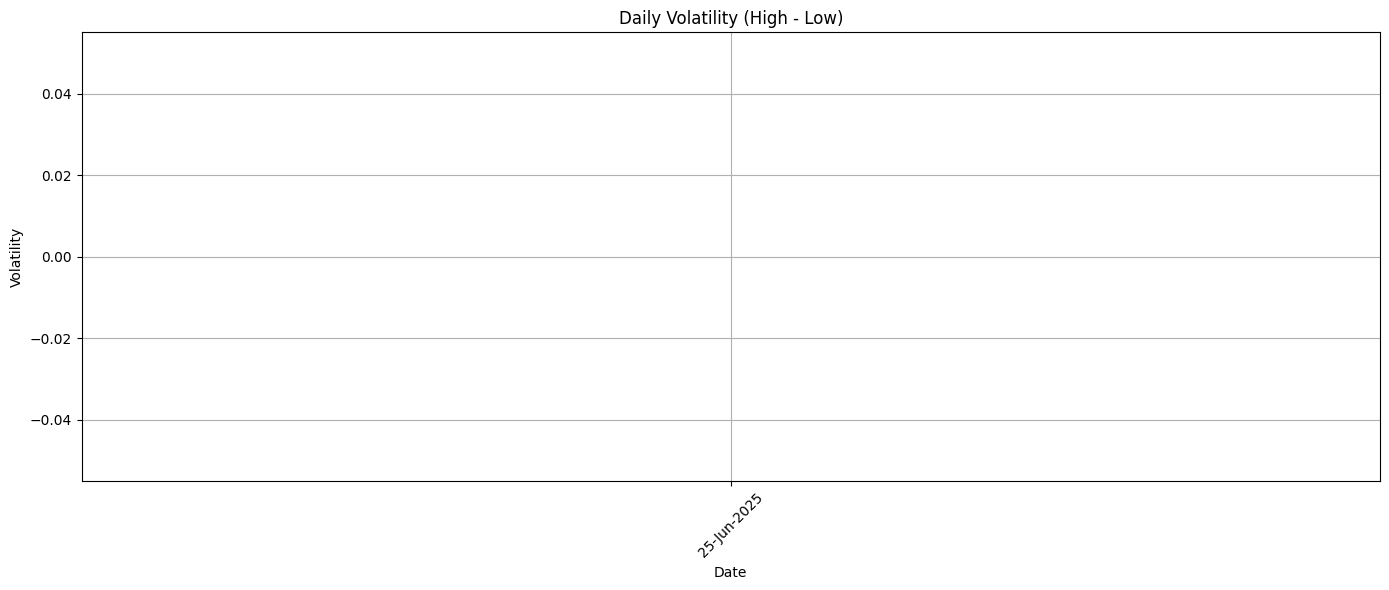

In [19]:
import matplotlib.pyplot as plt

def plot_close_price(df):
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['close'], marker='o', linestyle='-')
    plt.title('Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_price_change(df):
    plt.figure(figsize=(14, 6))
    plt.bar(df['Date'], df['Price Change %'], color='skyblue')
    plt.title('Daily Price Change Percentage')
    plt.xlabel('Date')
    plt.ylabel('Price Change %')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

def plot_volatility(df):
    if 'Volatility' in df.columns:
        plt.figure(figsize=(14, 6))
        plt.plot(df['Date'], df['Volatility'], color='orange')
        plt.title('Daily Volatility (High - Low)')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Volatility column not found in the DataFrame.")


plot_close_price(df)
plot_price_change(df)
plot_volatility(df)

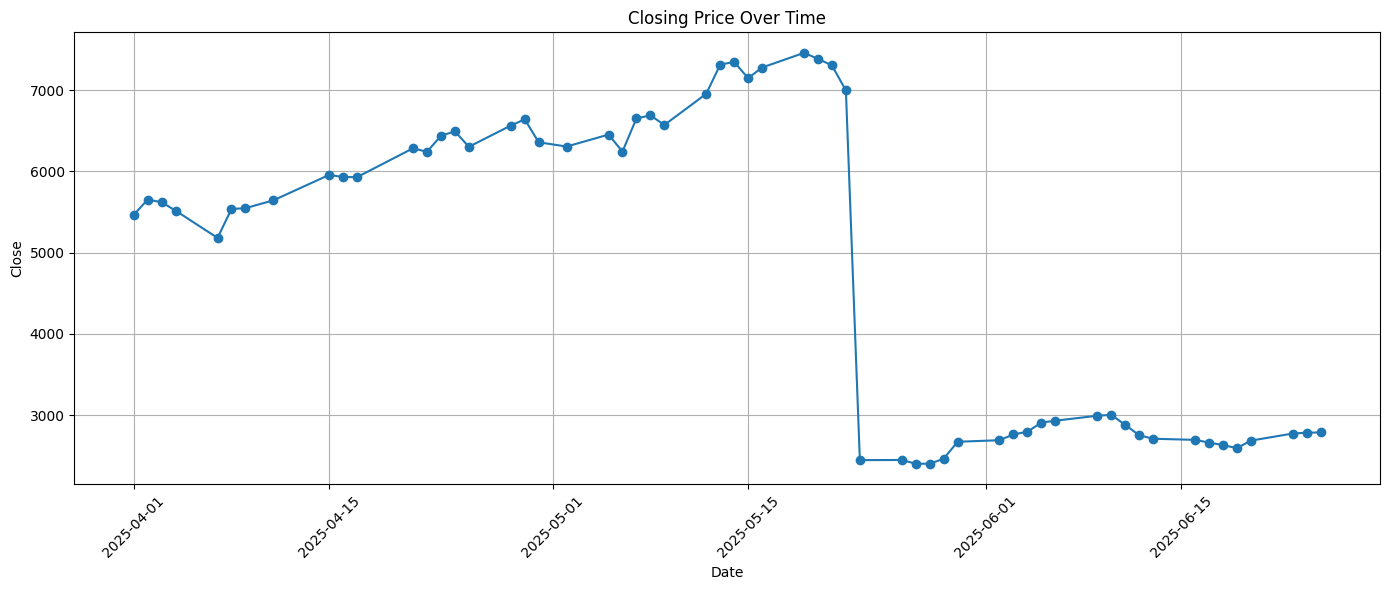

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data using your function
df = load_data("C:\\Users\\Hrulekh Nandan\\Documents\\institutional_buy_sell_prediction\\data\\bse.csv")

# Ensure the 'Date' column is in datetime format and sorted
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])           # Drop rows with invalid dates
df = df.sort_values('Date')               # Sort by date

# Set up the plot
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['close'], marker='o', linestyle='-')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


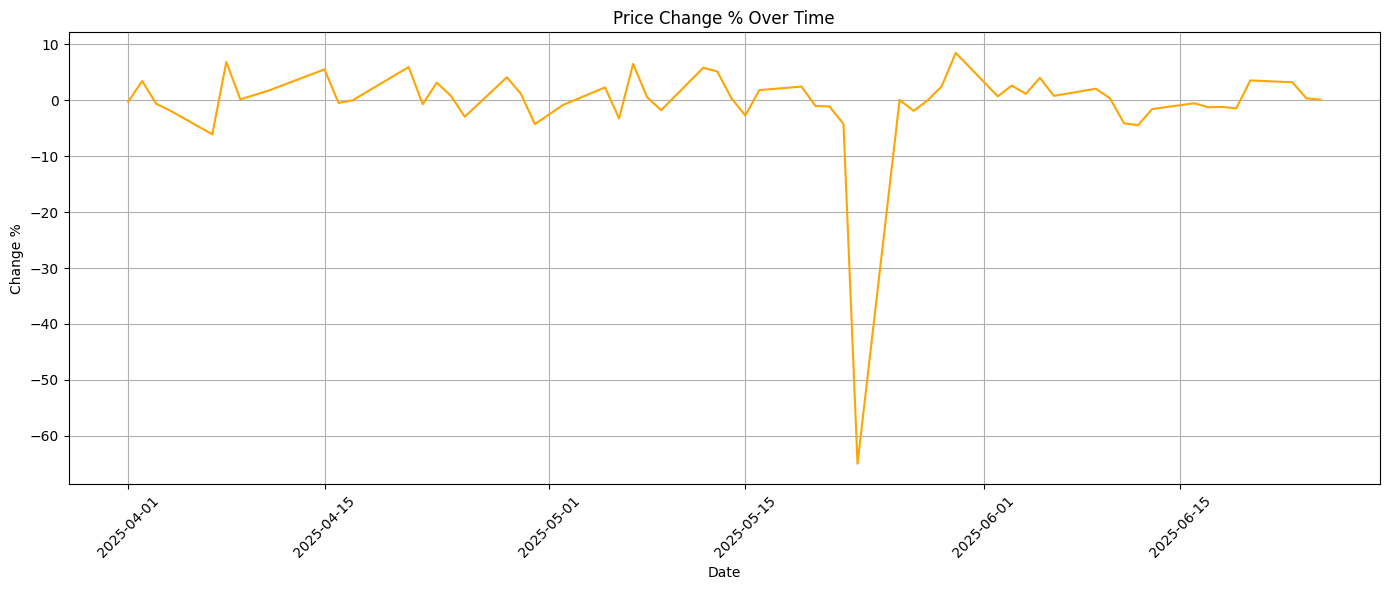

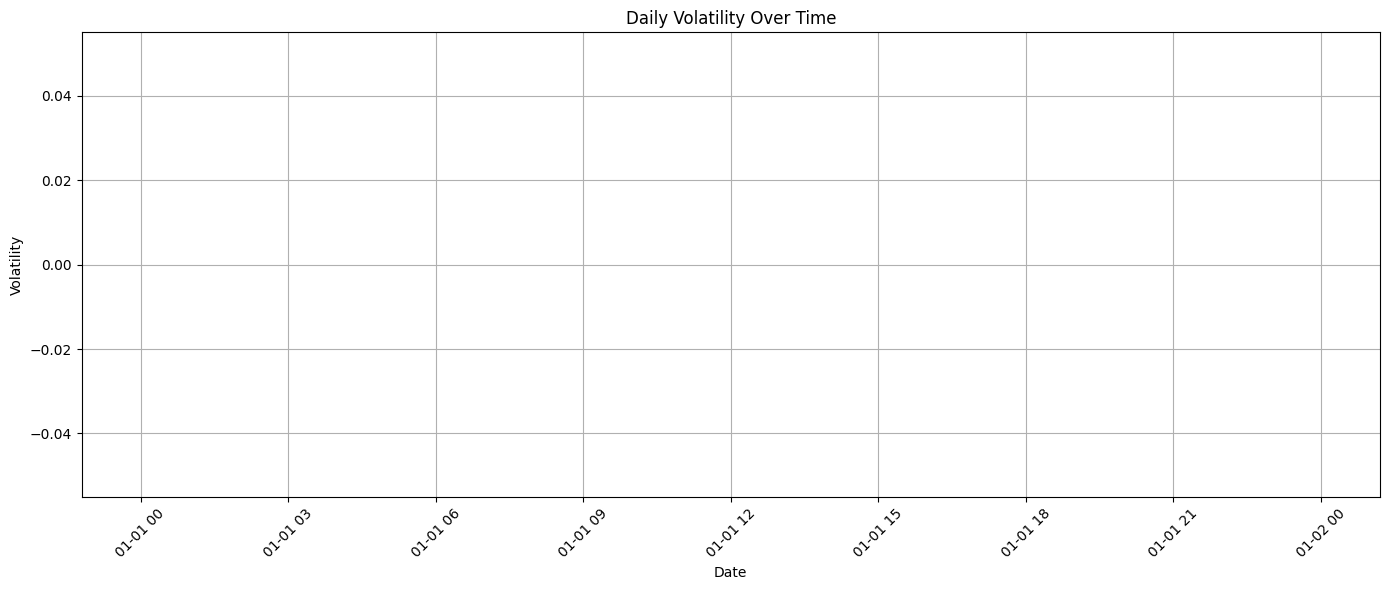

In [23]:
# Plot Price Change %
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price Change %'], color='orange')
plt.title('Price Change % Over Time')
plt.xlabel('Date')
plt.ylabel('Change %')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Volatility if present
if 'Volatility' in df.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Volatility'], color='purple')
    plt.title('Daily Volatility Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


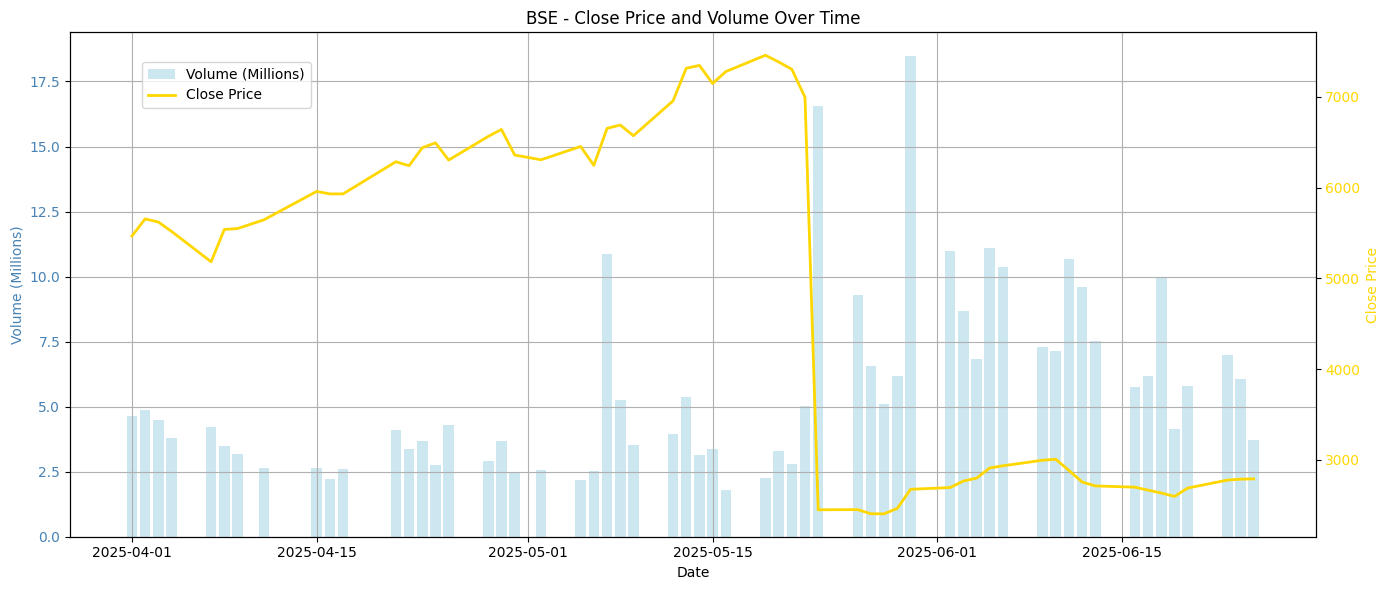

In [3]:
import sys
import os
sys.path.append("C:\\Users\\Hrulekh Nandan\\Documents\\institutional_buy_sell_prediction\\src")

from data_loader import load_data
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = load_data("C:\\Users\\Hrulekh Nandan\\Documents\\institutional_buy_sell_prediction\\data\\bse.csv")

if 'VOLUME' in df.columns:
    df['VOLUME'] = (
        df['VOLUME']
        .astype(str)
        .str.replace(',', '')
        .str.strip()
        .replace('', '0')
        .astype(float)
    )

# Convert Date column
if 'Date ' in df.columns:
    df.rename(columns={'Date ': 'Date'}, inplace=True)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values(by="Date")

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14,6))

# Plot Volume as bars
ax1.bar(df['Date'], df['VOLUME'] / 1e6, color='lightblue', alpha=0.6, label='Volume (Millions)')
ax1.set_ylabel("Volume (Millions)", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Create second axis for Close Price
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['close'], color='gold', label='Close Price', linewidth=2)
ax2.set_ylabel("Close Price", color='gold')
ax2.tick_params(axis='y', labelcolor='gold')

# Title and labels
plt.title("BSE - Close Price and Volume Over Time")
ax1.set_xlabel("Date")

# Grid
ax1.grid(True)

# Legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.tight_layout()
plt.show()

In [16]:
from data_loader import load_data

df = load_data("C:\\Users\\Hrulekh Nandan\\Documents\\institutional_buy_sell_prediction\\data\\bse.csv")

# Remove commas and convert to int
df['VOLUME'] = df['VOLUME'].str.replace(',', '').astype(float)


# 5-day moving average price
df['MA_5'] = df['close'].rolling(window=5).mean()

# 10-day moving average price
df['MA_10'] = df['close'].rolling(window=10).mean()

# 5-day average volume
df['Volume_MA_5'] = df['VOLUME'].rolling(window=5).mean()

# Today's volume divided by 5-day avg
df['Volume_Spike'] = df['VOLUME'] / df['Volume_MA_5']


# Price 3 days ago
df['Close_Lag_3'] = df['close'].shift(3)
# Momentum %
df['Momentum_3'] = ((df['close'] - df['Close_Lag_3']) / df['Close_Lag_3']) * 100


df['Volatility_5'] = df['close'].rolling(window=5).std()
# Only keep rows after the 10-day moving average is ready
df = df[df['MA_10'].notna()]


print(df[['Date', 'close', 'VOLUME', 'MA_5', 'MA_10', 'Volume_Spike', 'Momentum_3', 'Volatility_5']].head())



           Date   close      VOLUME     MA_5    MA_10  Volume_Spike  \
9   12-Jun-2025  2754.1   9601852.0  2692.06  2709.37      1.231179   
10  11-Jun-2025  2882.4  10665889.0  2741.90  2718.71      1.343423   
11  10-Jun-2025  3005.4   7137028.0  2810.10  2740.69      0.877398   
12  09-Jun-2025  2994.4   7298847.0  2869.50  2762.60      0.864581   
13  06-Jun-2025  2933.2  10365779.0  2913.90  2787.11      1.149980   

    Momentum_3  Volatility_5  
9     3.366612     46.025515  
10    6.858456     84.879444  
11   10.851284    131.327720  
12    8.725173    134.732401  
13    1.762420    102.168097  


In [18]:
print(df.columns)
print(df.shape)


Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades',
       'Price Change %', 'Volatility', 'MA_5', 'MA_10', 'Volume_MA_5',
       'Volume_Spike', 'Close_Lag_3', 'Momentum_3', 'Volatility_5'],
      dtype='object')
(49, 23)


In [19]:
df['Tomorrow_Close'] = df['close'].shift(-1)
df['Tomorrow_Return'] = (df['Tomorrow_Close'] - df['close']) / df['close']
df = df[df['Tomorrow_Return'].notna()]
print(df[['Date', 'close', 'Tomorrow_Close', 'Tomorrow_Return']])




           Date    close  Tomorrow_Close  Tomorrow_Return
9   12-Jun-2025  2754.10         2882.40         0.046585
10  11-Jun-2025  2882.40         3005.40         0.042673
11  10-Jun-2025  3005.40         2994.40        -0.003660
12  09-Jun-2025  2994.40         2933.20        -0.020438
13  06-Jun-2025  2933.20         2909.80        -0.007978
14  05-Jun-2025  2909.80         2797.10        -0.038731
15  04-Jun-2025  2797.10         2764.90        -0.011512
16  03-Jun-2025  2764.90         2693.30        -0.025896
17  02-Jun-2025  2693.30         2674.00        -0.007166
18  30-May-2025  2674.00         2464.50        -0.078347
19  29-May-2025  2464.50         2404.00        -0.024549
20  28-May-2025  2404.00         2404.00         0.000000
21  27-May-2025  2404.00         2450.00         0.019135
22  26-May-2025  2450.00         2448.00        -0.000816
23  23-May-2025  2448.00         6996.50         1.858047
24  22-May-2025  6996.50         7305.00         0.044093
25  21-May-202

In [ ]:
PREDICTION

In [24]:
features = [
    'MA_5',
    'MA_10',
    'Volume_Spike',
    'Momentum_3',
    'Volatility_5'
]
X = df[features]
y = df['Tomorrow_Return']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # IMPORTANT: no shuffling in time series
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
results = X_test.copy()
results['Actual_Return'] = y_test
results['Predicted_Return'] = y_pred
print(results)




MAE: 0.027532143479475534
RMSE: 0.0355982256752455
R2: -0.028255656581356092
       MA_5     MA_10  Volume_Spike  Momentum_3  Volatility_5  Actual_Return  \
47  6278.00  6356.500      0.784413   -7.889424    220.313129      -0.000084   
48  6165.40  6318.900      0.697342   -4.982777    226.425319       0.004637   
49  6069.20  6278.800      0.885607   -5.202864    178.156743      -0.052576   
50  5949.85  6179.125      0.932653   -4.826336    227.050490      -0.017078   
51  5802.52  6077.510      1.193241   -6.443807    191.411718      -0.001829   
52  5723.96  6000.980      1.228521   -7.045989    205.580499      -0.064236   
53  5574.35  5869.875      1.306210   -8.189911    277.358935       0.064641   
54  5486.24  5777.720      1.099022   -0.556922    176.738042       0.018741   
55  5481.46  5715.655      1.174835    1.492362    171.628619       0.006049   
56  5502.76  5652.640      1.164178    9.115380    187.847612      -0.033396   

    Predicted_Return  
47          0.00276

In [ ]:
Making it better

In [27]:
# Create binary labels: 1 if return >=0, else 0
y_train_class = (y_train >= 0).astype(int)
y_test_class = (y_test >= 0).astype(int)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest Classifier
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight="balanced"
)

# Train classifier
clf.fit(X_train, y_train_class)

# Predict
y_pred_class = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# See sample predictions
results_class = X_test.copy()
results_class['Actual_Direction'] = y_test_class.values
results_class['Predicted_Direction'] = y_pred_class
print(results_class.head(10))



Random Forest Classifier Evaluation:
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.25      0.25      0.25         4

    accuracy                           0.40        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.40      0.40      0.40        10

Confusion Matrix:
 [[3 3]
 [3 1]]
       MA_5     MA_10  Volume_Spike  Momentum_3  Volatility_5  \
47  6278.00  6356.500      0.784413   -7.889424    220.313129   
48  6165.40  6318.900      0.697342   -4.982777    226.425319   
49  6069.20  6278.800      0.885607   -5.202864    178.156743   
50  5949.85  6179.125      0.932653   -4.826336    227.050490   
51  5802.52  6077.510      1.193241   -6.443807    191.411718   
52  5723.96  6000.980      1.228521   -7.045989    205.580499   
53  5574.35  5869.875      1.306210   -8.189911    277.358935   
54  5486.24  5777.720      1.099022   -0.55

In [28]:
# Predict probabilities
y_probs = clf.predict_proba(X_test)

# Print probabilities
import numpy as np
np.set_printoptions(precision=3, suppress=True)
print(y_probs)


[[0.44  0.56 ]
 [0.342 0.658]
 [0.487 0.513]
 [0.404 0.596]
 [0.549 0.451]
 [0.576 0.424]
 [0.556 0.444]
 [0.609 0.391]
 [0.629 0.371]
 [0.617 0.383]]


In [31]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert probabilities to class predictions with threshold = 0.4
y_pred_custom = (np.array([0.56,0.658,0.513,0.596,0.451,0.424,0.444,0.391,0.371,0.383]) >= 0.4).astype(int)

# Evaluate
print("Accuracy:", accuracy_score(y_test_class, y_pred_custom))
print("Classification Report:\n", classification_report(y_test_class, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_custom))


Accuracy: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.29      0.50      0.36         4

    accuracy                           0.30        10
   macro avg       0.31      0.33      0.29        10
weighted avg       0.31      0.30      0.28        10

Confusion Matrix:
 [[1 5]
 [2 2]]


In [36]:
print(df.columns)

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades',
       'Price Change %', 'Volatility', 'MA_5', 'MA_10', 'Volume_MA_5',
       'Volume_Spike', 'Close_Lag_3', 'Momentum_3', 'Volatility_5',
       'Tomorrow_Close', 'Tomorrow_Return'],
      dtype='object')
